# Conan Shing

## Research Interests:

My background is in integrative physiology research where I have been exposed to both the process of data collection and intial exploratory data analysis where descriptive stats, summary tables, and intial data visuilizations are produced. That intial EDA often involves heavy cleaning of our raw data before being imported in R studio for further analysis. My reserch intrests in my academic life revolve around identify sex differences in physiological responses in male and females, so no better comparrison than identifiying how the ratio of male to female medal holders compare across countries. My personal background is high performance sport, a passio I bring into the lab and my everyday life. As such there is no better data set than olympic results. My research questions are listed and summarized below: 

##  Q1: How does the ratio of male to female medal holders vary across years. 

To answer this question I aim to compare the ammount of male vs female medla holders in the top contrey each year and identify if certain countries house predomenatly female or male medal winners. I first plan to use the medal results data, group by country and identify the number male and female medal holders for each country. From there I hope to identify which country containes the most male and most female medal holders. I would like to present this as a diffrence of male and female medal holders so I will need to add a column for each country with the number of medals won by men and women. I would also like to see how this changes over time. I would like to present this as a bar graph showing the proportion of male medal winners and female medal winners for each years top winning country. Next I would like to create a line plot showing how the diffrence of male vs female medal discrepency changes over time. 

## Q2: How does the country with the most medal holders at each game change over time and is this title associated with being the host country. 


To answer this question I plan to summarise the total number of medals attained at each game by country and identify the overall winner. From there I hope to compile a new sumarised data set where each country that attended the games have a total number of medals won where I then hope to plot all attendeing countries over time to see how the medal holding leaders change over time. I would also like to see if this has to do with being the host country that year. To do so I plan to compare avg medals won by non host countries attending the games and avg medals won by host countries. Out of intrest I would also like to see if this changes over time. 

For both my research questions some data wrangling will be needed. I most likely will combine the medal and host data sets to answer my second question and utilize the medals data set for my first. 



In [1]:
# setting up packages

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import sys
sys.path.append("../code")
import project_functions_conan as pf

In [2]:
# Set up visualization 

sns.set_theme(style="ticks",
              font_scale=1.3
             )

In [3]:
# loading data sets

df_2022athlete = pd.read_csv("../../data/raw/Beijing_2022_Olympic_Winter_Games/athletes.csv")
df_2022medals = pd.read_csv("../../data/raw/Beijing_2022_Olympic_Winter_Games/medals.csv")
df_hosts = pd.read_csv("../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_hosts.csv")
df_medals = pd.read_csv("../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_medals.csv")
df_results = pd.read_csv("../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_results.csv")

#df_2022athlete.head()
#df_2022medals.head()
#df_hosts.head()
#df_medals.head()
#df_results.head()

# Q1 EDA and Data vis

In [4]:
# confirming function test (keep this here)

df = pf.q1_load_process("../../data/raw/Olympic_Summer_Winter_Games_1986-2022/olympic_medals.csv")

### renaming df for future use
medal_bysex = df
medal_bysex
### Sanity check to make sure things are working right
medal_bysex.sample(10)

,discipline_title,year,event_gender,medal_type,participant_type,country_name,medal_bysex,medal_all_bysex,medal_total,medal_all,medal_%
21071,Rowing,1920,Men,GOLD,GameTeam,United States of America,38,85,42,96,90.476190
20212,Sailing,1964,Open,BRONZE,GameTeam,United States of America,4,8,34,102,11.764706
18505,Wrestling,2020,Men,GOLD,Athlete,United States of America,16,42,40,118,40.000000
2363,Alpine Skiing,1980,Men,BRONZE,Athlete,Canada,1,2,1,2,100.000000
13397,Nordic Combined,1928,Men,SILVER,Athlete,Norway,5,16,5,18,100.000000
18785,Swimming,2012,Women,GOLD,Athlete,United States of America,31,62,50,112,62.000000
12500,Equestrian Dressage,2012,Open,BRONZE,GameTeam,Netherlands,1,4,9,21,11.111111
5762,Cycling Track,1924,Men,GOLD,GameTeam,France,14,43,14,47,100.000000
13225,Cross Country Skiing,1984,Women,GOLD,GameTeam,Norway,1,5,3,13,33.333333
88,Shooting,1948,Men,SILVER,Athlete,Argentina,1,5,3,7,33.333333


<Axes: title={'center': 'Who are the top 10 ever medal winners'}, xlabel='Country Name', ylabel='Number of Medals'>

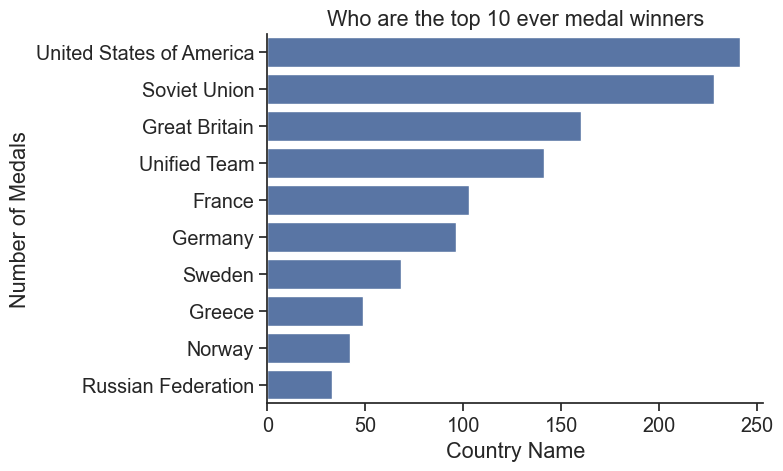

In [5]:
# Function confirmation and show plot (keep this here)

df = pf.q1_plot_prep(medal_bysex)

plot = sns.barplot(x="medal_all", y="country_name", data=df,
                   label="Total Medals Won", color="b")
plot.set(ylabel ="Number of Medals", xlabel ="Country Name", title = "Who are the top 10 ever medal winners")
sns.despine()

plot

# next steps would be to see what portion of these resutls were from males vs females 
# I would like to create a facet grid plot where top 10 medal winners from each games were ploted every year with the
# males vs female contribution was provided

## Q1 Final analysis and presentation plots

In [6]:
# function testing (keep this)

df = pf.q1_final_analysis(medal_bysex)

df1 = pf.q1_pres_plot(df)

(0.0, 300.0)

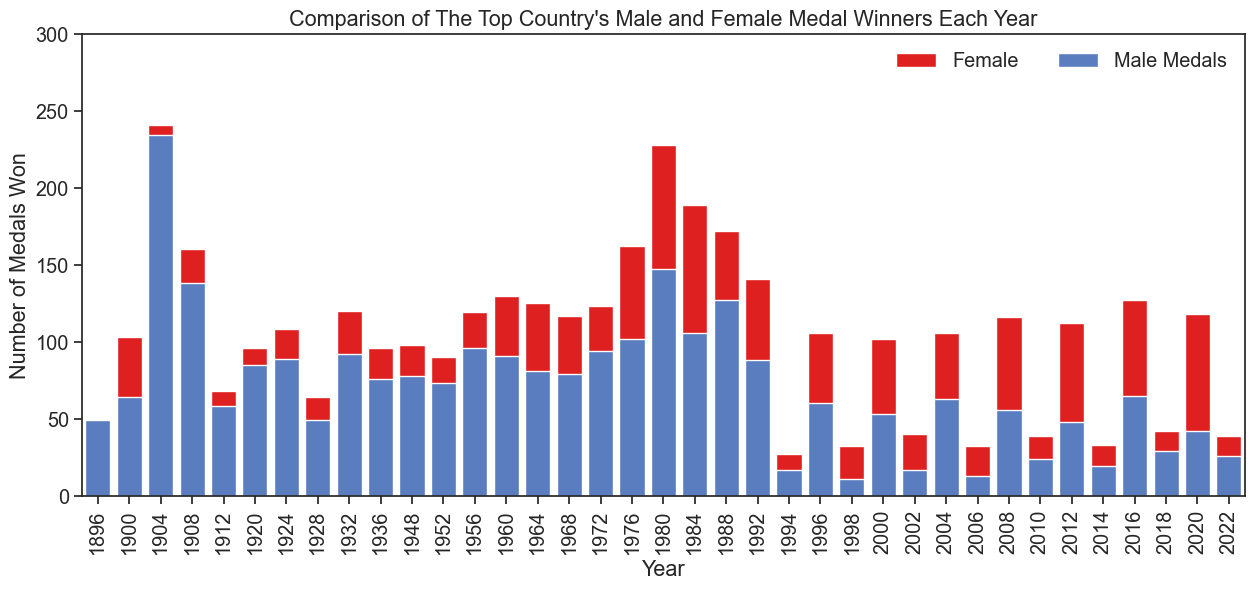

In [7]:
# Q1 final analysis and plots (keep this)

plt.figure(figsize=(15,6))
#Plot the total medals won
sns.set_color_codes("pastel")
plot = sns.barplot(y="medal_all", x="year", data=df,
            label="Female", color="red")

# Plot the male medals won
sns.set_color_codes("muted")
plot = sns.barplot(y="medal_all_bysex", x="year", data=df,
            label="Male Medals", color="b")

plt.xticks(rotation=90)
plot.legend(ncol=2, loc="upper right", frameon=False)
plot.set(xlabel = "Year", ylabel ="Number of Medals Won", title = "Comparison of The Top Country's Male and Female Medal Winners Each Year")
plot.set_ylim(0, 300)


<Axes: title={'center': 'Gender Differences in Medal Winners Over Time'}, xlabel='Year', ylabel='Difference Between Male and Female Medal Winners'>

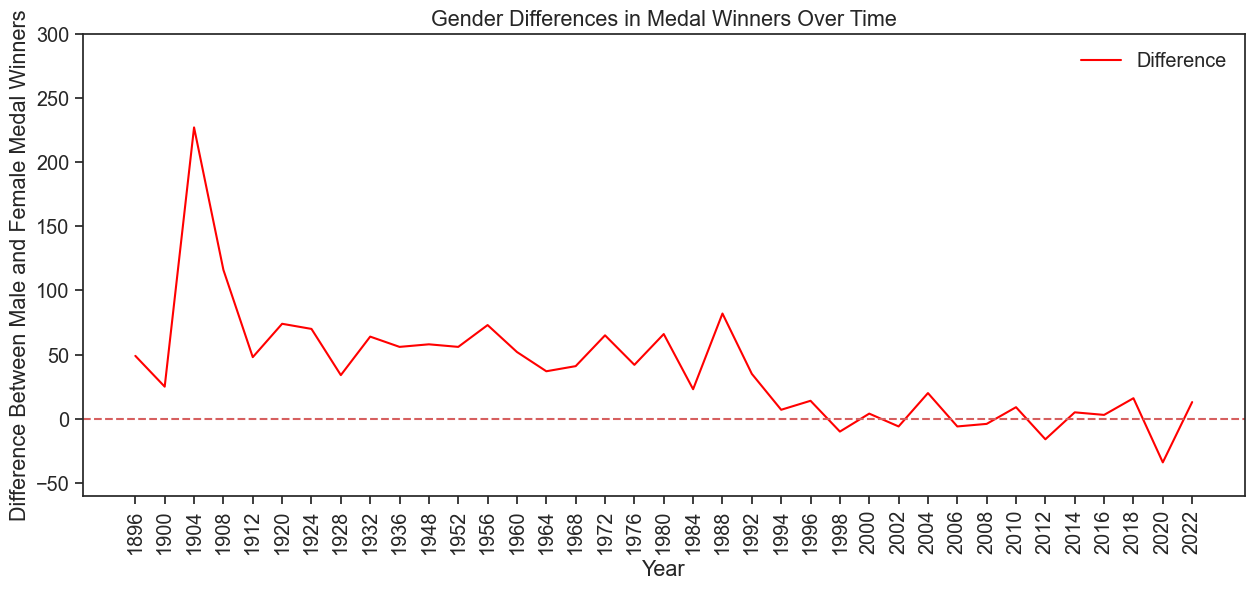

In [8]:
#plot change in medal winner discrepency over time (keep this)

plt.figure(figsize=(15,6))

plot1 = sns.lineplot(x="Year", y="Male vs Female Diffrence", data=df1, label="Difference", color="red")
plot1.set(xlabel = "Year", ylabel= 'Difference Between Male and Female Medal Winners', title = "Gender Differences in Medal Winners Over Time")

plt.xticks(rotation=90)
plot1.set_ylim(-60, 300)
plot1.axhline(0, color="r", linestyle='--')
plot1.legend(loc="upper right", frameon=False)

plot1

In [9]:
# Q1 final analysis and summary table (keep this)

output = df1
output

,Year,Country,Male Medal Winners,Total Medals Won,medal_%,Female Medal Winners,Male vs Female Diffrence
0,1896,Greece,49,49,100.000000,0,49
1,1900,France,64,103,59.459459,39,25
2,1904,United States of America,234,241,97.530864,7,227
3,1908,Great Britain,138,160,83.333333,22,116
4,1912,Sweden,58,68,80.769231,10,48
5,1920,United States of America,85,96,85.185185,11,74
6,1924,United States of America,89,108,18.000000,19,70
7,1928,United States of America,49,64,75.000000,15,34
8,1932,United States of America,92,120,84.848485,28,64
9,1936,Germany,76,96,79.310345,20,56


### Q1 Conclusions 

Above I show the number of medals won by the top country each year split into male and total medal winners. I've excluded open and mixed sports for simplicity and to compare the absolute nubmer of male medal winners to female medal winners. It appears just by looking at the plot males appear to win more medals however after 1994 this appears to even out a bit although that claim can not be validated just by looking at it. Fortunatly There is a table that tells you what years females did better than males at the games. We can see that in 1998, 2008, 2012, and 2020 females made up a greater portion of the total medals won compared to males. In the grand scheme of things males appear to make up a greater portion of medals won by the top country at each years games however this trend is reducing with the more recent games. 

# Q2 EDA and Data vis

In [12]:
# Q2 EDA (keep this)

df_merge = pf.q2_merge(df_hosts, medal_bysex)

df_merge

,game_location,game_season,year,discipline_title,event_gender,medal_type,participant_type,country_name,medal_bysex,medal_all_bysex,medal_total,medal_all,medal_%
0,China,Winter,2022,Freestyle Skiing,Women,GOLD,Athlete,Australia,1,3,1,4,100.000000
1,China,Winter,2022,Snowboard,Men,SILVER,Athlete,Australia,1,1,2,4,50.000000
2,China,Winter,2022,Snowboard,Women,BRONZE,Athlete,Australia,1,3,1,4,100.000000
3,China,Winter,2022,Skeleton,Women,SILVER,Athlete,Australia,1,3,2,4,50.000000
4,China,Winter,2022,Snowboard,Men,GOLD,Athlete,Austria,5,10,7,19,71.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32041,Greece,Summer,1896,Athletics,Men,SILVER,Athlete,United States of America,7,20,7,20,100.000000
32042,Greece,Summer,1896,Athletics,Men,GOLD,Athlete,United States of America,11,20,11,20,100.000000
32043,Greece,Summer,1896,Shooting,Men,GOLD,Athlete,United States of America,11,20,11,20,100.000000
32044,Greece,Summer,1896,Shooting,Men,SILVER,Athlete,United States of America,7,20,7,20,100.000000


In [13]:
# Q2 Data vis

# which country has hosted the games the most? 
plt.figure(figsize=(10,10))

plot = sns.countplot(df1, y="game_location",
                     order = (df1['game_location'].value_counts().index),
                     hue = 'game_season') 

plot.set(xlabel ="Number of Times Hosting", ylabel ="Country Name", title = "How Many Times Has Each Host Country Hosted a Games")
plt.legend(title='Game Season', frameon=False)
sns.despine()

plot

KeyError: 'game_location'

<Figure size 1000x1000 with 0 Axes>

In [ ]:
# reshow the most ever won medals, lets compare how the 2 plots differ 

df = pf.q1_plot_prep(medal_bysex)

plot = sns.barplot(x="medal_all", y="country_name", data=df,
                   label="Total Medals Won", color="b")
plot.set(ylabel ="Number of Medals", xlabel ="Country Name", title = "Who are the top 10 ever medal winners")
sns.despine()

plot



## Q2 Final analysis and plots

In [ ]:
# merging and preparing data frames for plotting 

df_merge = pf.q2_plotprep(df_hosts, medal_bysex)

In [ ]:
# plot relationship between times hosting and medals won

plot = sns.catplot(data=df_merge, x="counts", y="medal_all", native_scale=True, zorder=1, height=4, aspect=2)
plot = sns.regplot(data=df_merge, x="counts", y="medal_all", scatter=False, truncate=False, order=2, color=".2")

plot.set_xticks([0,1,2,3,4,5,6,7,8])
plot.set(xlabel ="Number of Times Hosting", ylabel ="Number of medals won", title = "Relationship Between Number of Time Hosting and Medals Won")
plot

### Q2 Conclusions

# Q3 EDA and Data vis

In [ ]:
# Q3: Which sport is most female and male dominated and does this differ by country? 

#### as it would be next to impossible to find datasets spanning back to the 1890s with accurate lists of athletes that were
#### sent to each games I have chosen the 2022 olympics as it was recent and relevant to conduct my analysis

#### combining 2022 athlete and medal data sets to add a sex column to the medals 


df_merged = pf.q3_eda(df_2022athlete, df_2022medals)

#### df_merged was prepared out of curiosoity not sure if I will use it

In [ ]:
df = pf.q3_calc(df_2022athlete)

In [ ]:
# Q3 Data vis 

plot = sns.catplot(data=df, kind="bar",
                   x="country", y="athletes_sent",
                   errorbar=None,
                   width=1,
                   hue="gender",
                   height=6, aspect=3)

plot.set_xticklabels(rotation=90)
plot.set(ylabel ="Number of Athlets sent", title = "Male and Female Athletes Sent to 2022 Olympics")
plt.xticks(fontsize=14)

plot

### It seemes that most countreis send more males than females to the 2022 games, my next step I would like to take is to
### to compare the top 10 medal winners at the 2022 games and see what % of thoose medals were won by males and females
### I think a good plot to use could be a stacked bar blot...

## Q3 Final Analysis and Plots

In [ ]:
# adding calculated columns to dataframes to detemrine how many male and female atheltes each country sent to the 2022 olympics

df = pf.q3_final_plotprep(df_2022athlete, df_2022medals)

In [ ]:
#spliting dataframes to male and female for stats 

df_male = df[df['gender'] == 'Male']
df_female = df[df['gender'] == 'Female']

In [ ]:
# male linear regressoin 
slope, intercept, r_value, p_value, std_err = stats.linregress(df_male['athletes_total'],df_male['medal_count'])

plot = sns.regplot(x="athletes_total", y="medal_count", data=df_male, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})


plot.legend()
sns.despine()
plot.set(ylabel ="Medals Won", xlabel ="Male Athletes Sent", title = "Regression of Medals won vs Male Athletes Sent")


plot


In [ ]:
# female linear regressoin 
slope, intercept, r_value, p_value, std_err = stats.linregress(df_female['athletes_total'],df_female['medal_count'])

plot = sns.regplot(x="athletes_total", y="medal_count", data=df_female, color='pink', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

plot.legend()
sns.despine()
plot.set(ylabel ="Medals Won", xlabel ="Female Athletes Sent", title = "Regression of Medals won vs Female Athletes Sent")

plot

In [ ]:
# wrangling and spliting dataframe in to male and female top medal counts by country

df_dis = df.sort_values('medal_count',ascending = False).groupby(['country']).head(1)

df_dis_male = df_dis[df_dis['gender'] == 'Male'].head(10)
#df_dis_male

df_dis_female = df_dis[df_dis['gender'] == 'Female'].head(10)
#df_dis_female

In [ ]:
# bar plot comparing top 10 medal winning countries athletes gender distribution (of the athletes that went how many won medals)

#set figure size
plt.figure(figsize=(15,6))

#Plot the total medals won
sns.set_color_codes("pastel")
plot = sns.barplot(y="athletes_sent", x="country", data=df_dis_male,
            label="Total", color="b")

plt.xticks(rotation=30)
plot.set_ylim(0, 150)
plot.legend(ncol=2, loc="upper left", frameon=False)
plot.set(xlabel = "Country", ylabel ="Number of Athletes Sent", title = "Comparison of Male Athletes sent vs Medals Won")

plot1 = plot.twinx()
sns.set_color_codes("muted")
plot1 = sns.barplot(y="medal_count", x="country", data=df_dis_male,
            label="Medals Won", color="b")

plot1.set_ylim(0, 150)
plot1.legend(ncol=2, loc="upper right", frameon=False)
plot1.set(ylabel = "Medals Won")
plot1



In [ ]:
# bar plot comparing top 10 medal winning countries athletes gender distribution (of the athletes that went how many won medals)

#set figure size
plt.figure(figsize=(15,6))

#Plot the total medals won
sns.set_color_codes("pastel")
plot = sns.barplot(y="athletes_sent", x="country", data=df_dis_female,
            label="Total", color="pink")

plt.xticks(rotation=30)
plot.set_ylim(0, 130)
plot.legend(ncol=2, loc="upper left", frameon=False)
plot.set(xlabel = "Country", ylabel ="Number of Athletes Sent", title = "Comparison of Female Athletes sent vs Medals Won")

plot1 = plot.twinx()
sns.set_color_codes("muted")
plot1 = sns.barplot(y="medal_count", x="country", data=df_dis_female,
            label="Medals Won", color="red")

plot1.set_ylim(0, 90)
plot1.legend(ncol=2, loc="upper right", frameon=False)
plot1.set(ylabel = "Medals Won")
plot1


### Q3 Conclusions



## Analysis Plan 

This inital EDA took about about 5ish hours of workin. I am fortunate to have lots of experaince wrangling and cleaning data in R and I found it helpful to draft out my analysis and EDA plan in R before converting it to python (a language I am new to). My primary research questions are sill valid and I think I can produce some very meaningful plots to show off my answer. 

My first question asks "How does the ratio of male to female medal holders vary across countries?". Currently I have shown the top 10 highest medal counts ever and my next step would be to create a facet wraped plot where each year I show the top 10 medal count winners from that games and show what % of it came from males or females. To get some qunatitative data I would like to manipulate (max, mins, means, IQRs) the data frame to see what the highest female % is  as well as see the average % contribution. 

My next question asks "How does the country with the most medal holders at each game change over time and is this title associated with being the host country?". Currently I have merged the historic host data frame and the historic medal data frame togehter to show where each games was hosted. Fortunatly I also have the countries of the medal winners and I would like to see how the numbers of medals won by host countries differ to the number of medals won by the non host country (compare mean nonhost to host) I would also like to plot the medal winners using facet grid with the columns set as host country. 

Finally I came up with a new question out of curiosity...which I belive is the name of the game. I would like to see which sport is most female and male dominated and does this differ by country? Currently I have selected the 2022 games dataset as I feel it is unreasonable to create an analysis for every single games nor would it be feasible to find athlete manifests for each of the games. My next possible analysis step would be to compare how many male vs female atheltes were sent to each sport, male vs female medal winners for each country, and how the % of total medal counts vary across countries. Based on my inital EDA it seemed that most countreis send more males than females to the 2022 games, my next step I would like to take is to compare the top 10 medal winners at the 2022 games and see what % of thoose medals were won by males and females. I think a good plot to use could be a stacked bar blot to show this off. 